In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('combined.xlsx')

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df,train_columns,test_columns,target_column):#第一个参数输入数据集，第二个参数输入列号，第三个参数输入制定列名
    ## gettting all the features except survived
    age_df=df[df.columns[train_columns]]
    temp_train = age_df.loc[age_df[target_column].notnull()] 
    temp_test = age_df.loc[age_df[target_column].isnull()] 
#     temp_train = age_df.loc[age_df.是否吸烟.notnull()] ## df with age values
#     temp_test = age_df.loc[age_df.是否吸烟.isnull()] ## df without age values
    
    y = temp_train[target_column].values ## setting target variables(age) in y 
    X = temp_train[temp_train.columns[test_columns]].values
    
    rmse = []
    nestimators = []
    predict_age=[]
    for n in [1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800]:
        rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1,random_state=0)
        rfr.fit(X, y)
        #由于已知数据空缺，用训练集里的数据算预测值，再用预测值与训练集已知数据比较，算模型得分
        #y_predict = rfr.predict(temp_train.iloc[:,x:z].values)
        y_predict = rfr.predict(temp_train[temp_train.columns[test_columns]].values)
        y_test=temp_train[target_column].values
        ##
        
        
        rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
        nestimators=np.append(nestimators,n)
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        predict_age.append(rfr.predict(temp_test[temp_test.columns[test_columns]].values))
    
    
    index_of_minimum = np.argmin(rmse)#找到rmse数组的最小值，即最优值的索引
    predict_age=predict_age[index_of_minimum]
    predict_age1=predict_age.astype(int)
    print(index_of_minimum)
    df.loc[df[target_column].isnull(), target_column] = predict_age1
    
    
    # Creating a bar plot
    sns.set_style('whitegrid')
    plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features/RMSE")
    plt.savefig('output.png', dpi=4000, bbox_inches='tight')
    plt.show()
    return df
## Implementing the completing_age function in both train and test dataset. 


10


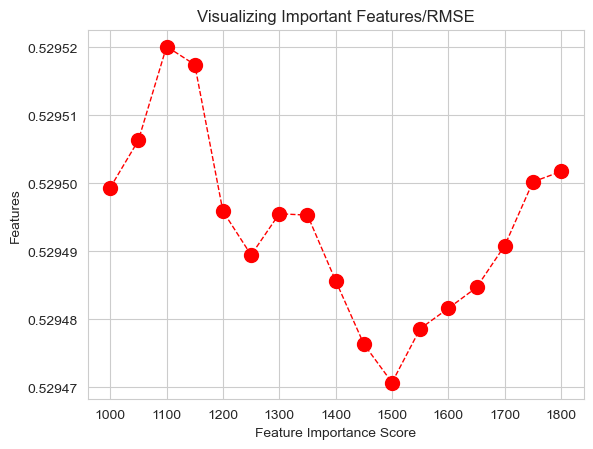

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,NaN,NaN,NaN,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,NaN,NaN,NaN,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,NaN,NaN,NaN,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,NaN,NaN,NaN,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,NaN,NaN,NaN,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,NaN,NaN,NaN,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [90]:
train_columns=[0,1,2,3,4,5]
test_columns=[0,1,2,3,4]
completing_age(data,train_columns,test_columns,'是否吸烟')

In [91]:
def write_special_values(df,special_condition,target_column,write_column):

    # 使用条件筛选出要修改的行
    rows_to_update = df.loc[df[target_column] == special_condition].index

    # 将指定列的值赋值为0
    df.loc[rows_to_update, write_column] = 0
    return df

In [92]:
data=write_special_values(data,2,'是否吸烟','开始吸烟年龄')

In [93]:
data=write_special_values(data,3,'是否吸烟','开始吸烟年龄')

16


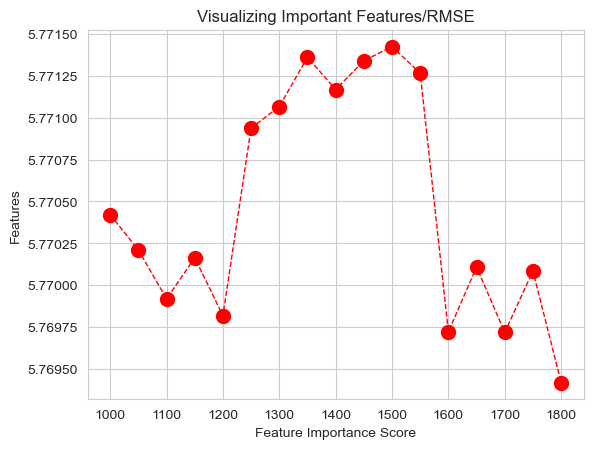

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,NaN,NaN,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,NaN,NaN,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,NaN,NaN,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,NaN,NaN,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,NaN,NaN,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,NaN,NaN,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [94]:
train_columns=[0,1,2,3,4,5,6]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'开始吸烟年龄')

In [95]:
data=write_special_values(data,2,'是否吸烟','平均每周吸烟天数')

In [96]:
data=write_special_values(data,3,'是否吸烟','平均每周吸烟天数')

In [97]:
data=write_special_values(data,2,'是否吸烟','一天吸烟支数')
data=write_special_values(data,3,'是否吸烟','一天吸烟支数')

5


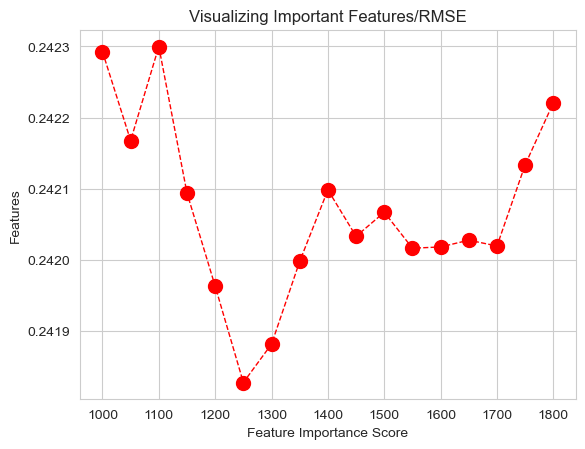

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [98]:
train_columns=[0,1,2,3,4,5,6,7]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'平均每周吸烟天数')

13


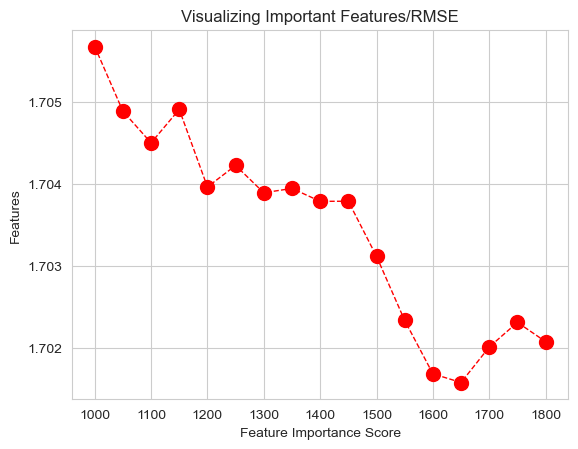

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [99]:
train_columns=[0,1,2,3,4,5,6,7,8]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'一天吸烟支数')

10


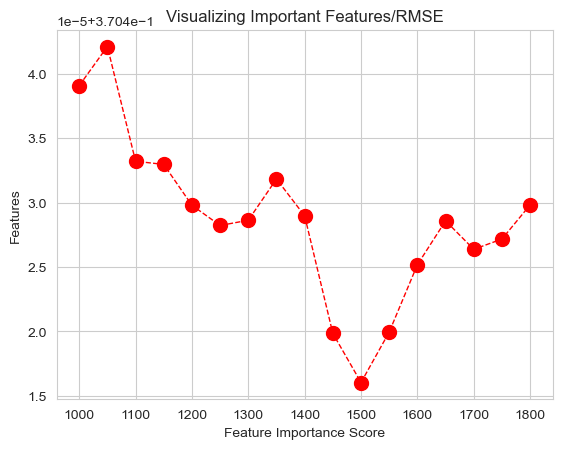

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [100]:
train_columns=[0,1,2,3,4,5,9]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'是否被动吸烟')

In [102]:
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


16


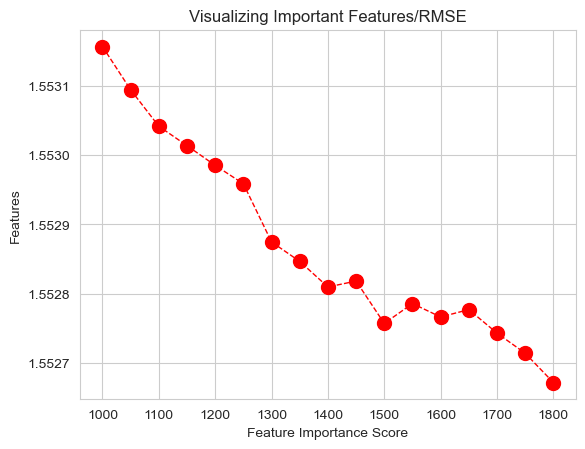

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [103]:
train_columns=[0,1,2,3,4,5,10]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'被动吸烟天数为')

7


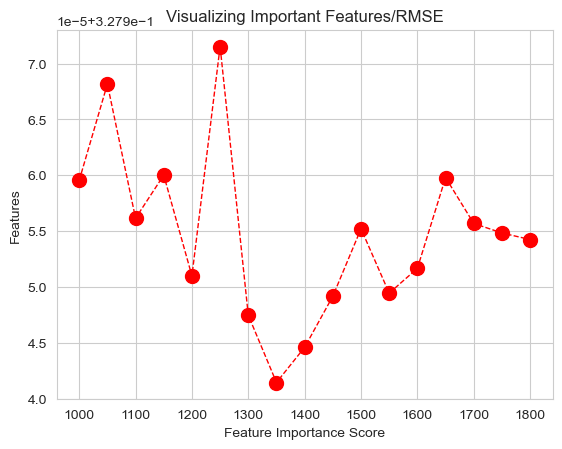

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [104]:
train_columns=[0,1,2,3,4,5,11]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'是否饮酒')

In [105]:
data=write_special_values(data,2,'是否饮酒','饮酒年数')
data=write_special_values(data,3,'是否饮酒','饮酒年数')

In [106]:
data=write_special_values(data,2,'是否饮酒','是否饮用高度白酒')
data=write_special_values(data,3,'是否饮酒','是否饮用高度白酒')
data=write_special_values(data,2,'是否饮酒','高度白酒饮用频率')
data=write_special_values(data,3,'是否饮酒','高度白酒饮用频率')
data=write_special_values(data,2,'是否饮酒','高度白酒平均每次饮用量')
data=write_special_values(data,3,'是否饮酒','高度白酒平均每次饮用量')
data=write_special_values(data,2,'是否饮酒','是否饮用低度白酒')
data=write_special_values(data,3,'是否饮酒','是否饮用低度白酒')
data=write_special_values(data,2,'是否饮酒','低度白酒饮用频率')
data=write_special_values(data,3,'是否饮酒','低度白酒饮用频率')
data=write_special_values(data,2,'是否饮酒','低度白酒平均每次饮用量')
data=write_special_values(data,3,'是否饮酒','低度白酒平均每次饮用量')
data=write_special_values(data,2,'是否饮酒','是否饮用啤酒')
data=write_special_values(data,3,'是否饮酒','是否饮用啤酒')
data=write_special_values(data,2,'是否饮酒','啤酒饮用频率')
data=write_special_values(data,3,'是否饮酒','啤酒饮用频率')
data=write_special_values(data,2,'是否饮酒','啤酒平均每次饮用量')
data=write_special_values(data,3,'是否饮酒','啤酒平均每次饮用量')
data=write_special_values(data,2,'是否饮酒','是否饮用黄酒或糯米酒')
data=write_special_values(data,3,'是否饮酒','是否饮用黄酒或糯米酒')
data=write_special_values(data,2,'是否饮酒','黄酒或糯米酒饮用频率')
data=write_special_values(data,3,'是否饮酒','黄酒或糯米酒饮用频率')
data=write_special_values(data,2,'是否饮酒','黄酒或糯米酒平均每次饮用量')
data=write_special_values(data,3,'是否饮酒','黄酒或糯米酒平均每次饮用量')
data=write_special_values(data,2,'是否饮酒','是否饮用葡萄酒')
data=write_special_values(data,3,'是否饮酒','是否饮用葡萄酒')
data=write_special_values(data,2,'是否饮酒','葡萄酒饮用频率')
data=write_special_values(data,3,'是否饮酒','葡萄酒饮用频率')
data=write_special_values(data,2,'是否饮酒','葡萄酒平均每次饮用量')
data=write_special_values(data,3,'是否饮酒','葡萄酒平均每次饮用量')

5


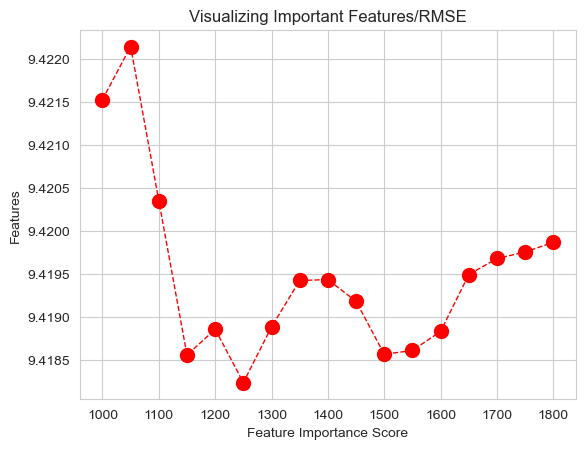

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [107]:
train_columns=[0,1,2,3,4,11,12]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'饮酒年数')

2


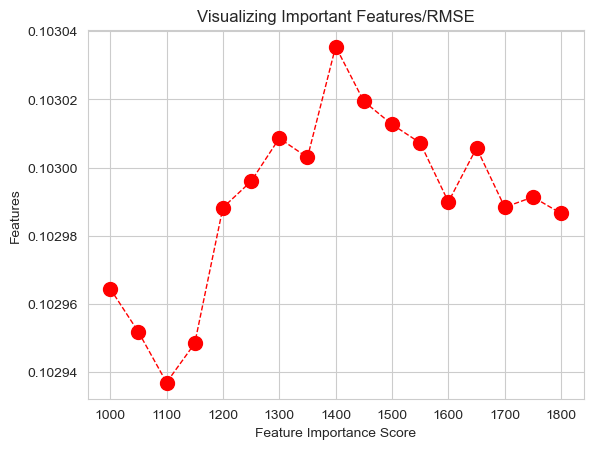

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [108]:
train_columns=[0,1,2,3,4,11,12,13]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否饮用高度白酒')

8


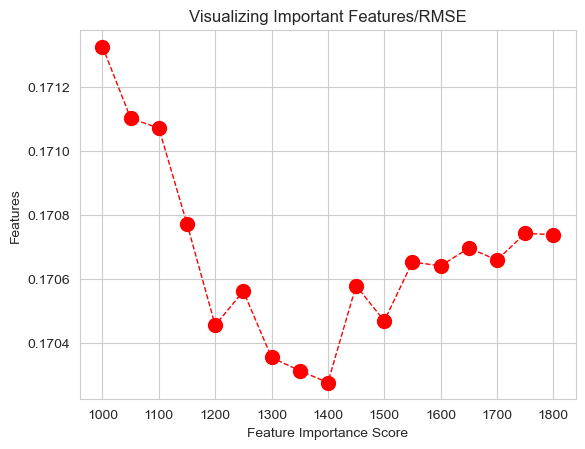

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [109]:
train_columns=[0,1,2,3,4,11,12,13,14]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'高度白酒饮用频率')

9


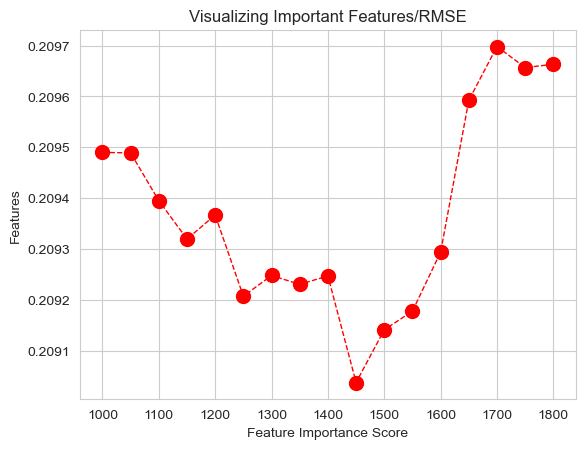

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [111]:
train_columns=[0,1,2,3,4,11,12,13,14,15]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'高度白酒平均每次饮用量')

11


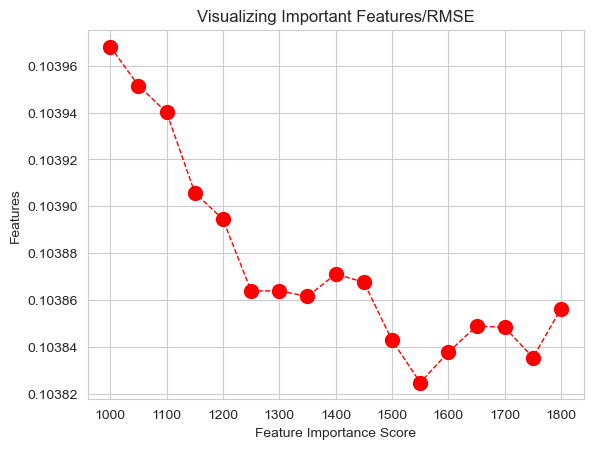

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [112]:
train_columns=[0,1,2,3,4,11,12,16]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否饮用低度白酒')

0


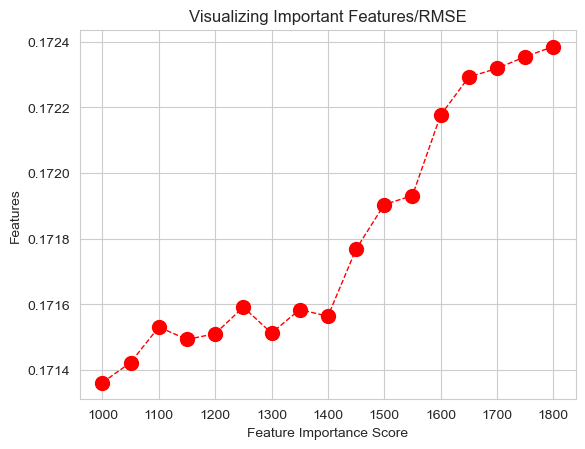

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [113]:
train_columns=[0,1,2,3,4,11,12,16,17]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'低度白酒饮用频率')

16


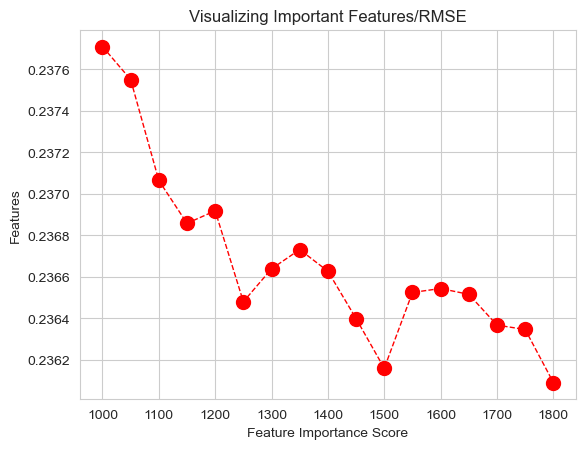

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [114]:
train_columns=[0,1,2,3,4,11,12,16,17,18]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'低度白酒平均每次饮用量')

16


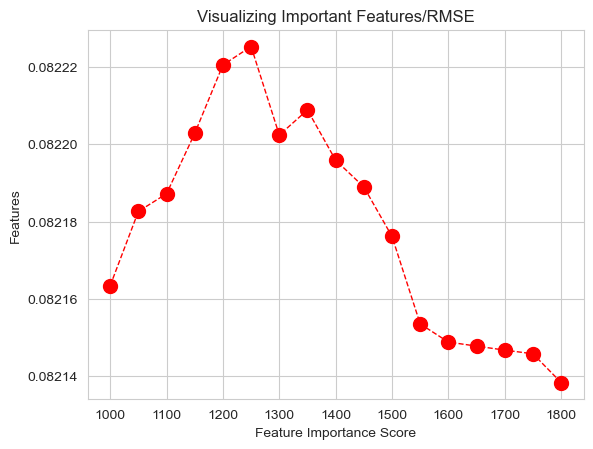

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [115]:
train_columns=[0,1,2,3,4,11,12,19]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否饮用啤酒')

11


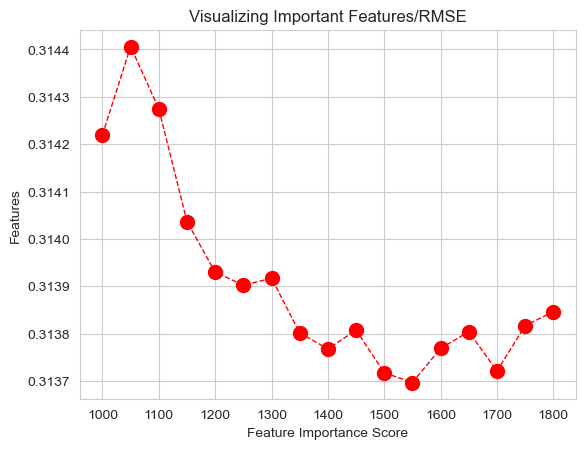

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [116]:
train_columns=[0,1,2,3,4,11,12,19,20]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'啤酒饮用频率')

14


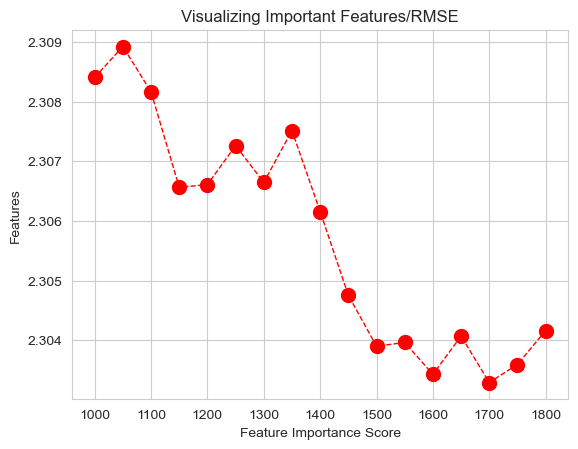

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [117]:
train_columns=[0,1,2,3,4,11,12,19,20,21]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'啤酒平均每次饮用量')

12


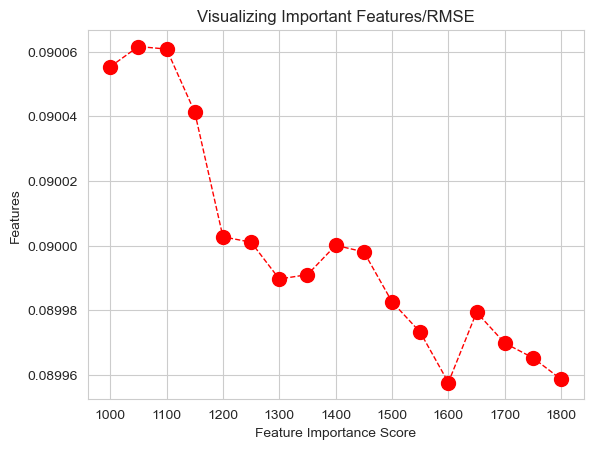

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [118]:
train_columns=[0,1,2,3,4,11,12,22]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否饮用黄酒或糯米酒')

13


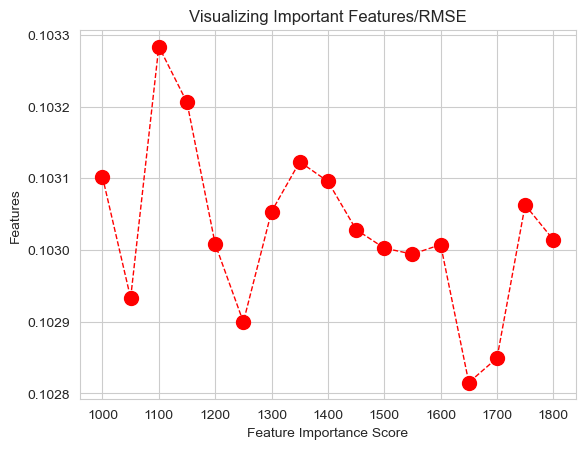

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [119]:
train_columns=[0,1,2,3,4,11,12,22,23]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'黄酒或糯米酒饮用频率')

7


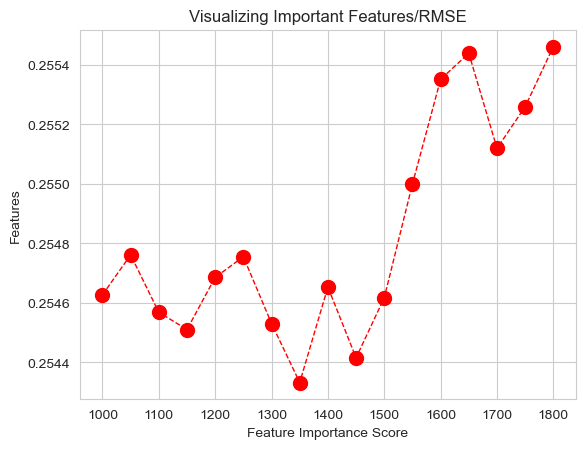

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [120]:
train_columns=[0,1,2,3,4,11,12,22,23,24]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'黄酒或糯米酒平均每次饮用量')

11


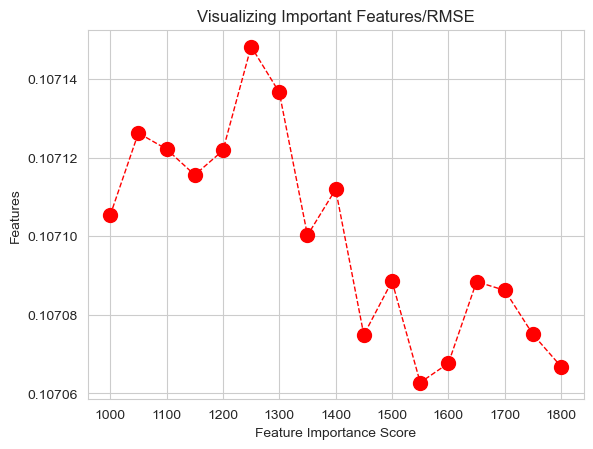

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [121]:
train_columns=[0,1,2,3,4,11,12,25]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否饮用葡萄酒')

0


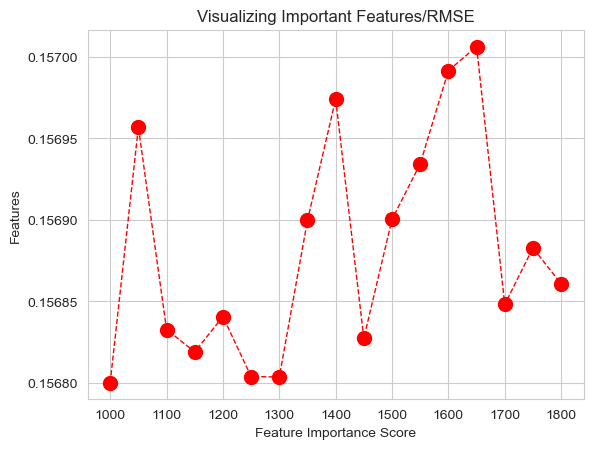

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [122]:
train_columns=[0,1,2,3,4,11,12,25,26]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'葡萄酒饮用频率')

15


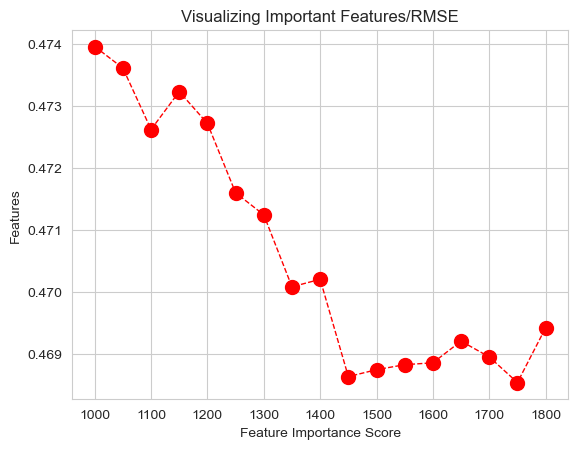

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [123]:
train_columns=[0,1,2,3,4,11,12,25,26,27]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'葡萄酒平均每次饮用量')

In [124]:
# data.to_excel('output2.xlsx',index=False)

0


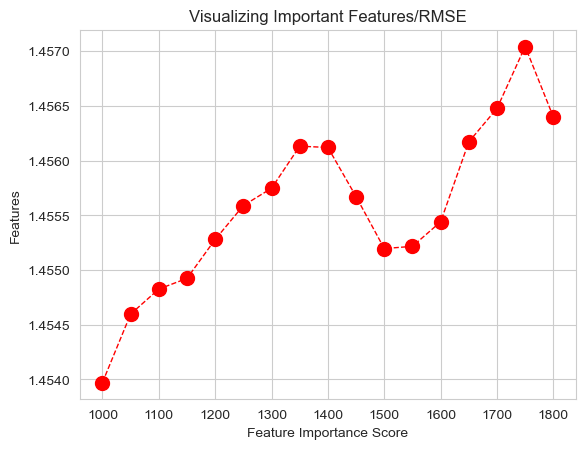

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [125]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,103]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'植物油')

5


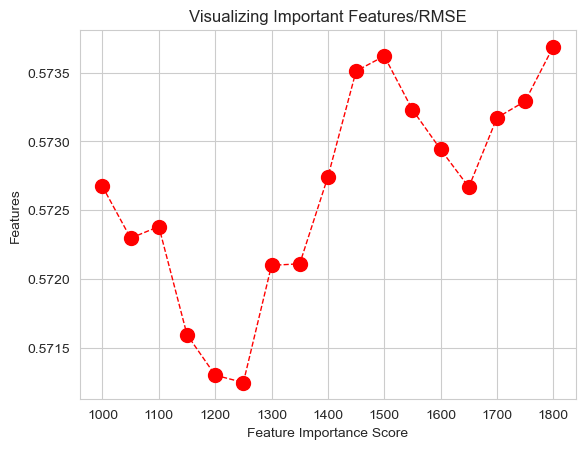

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [126]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,104]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'动物油')

2


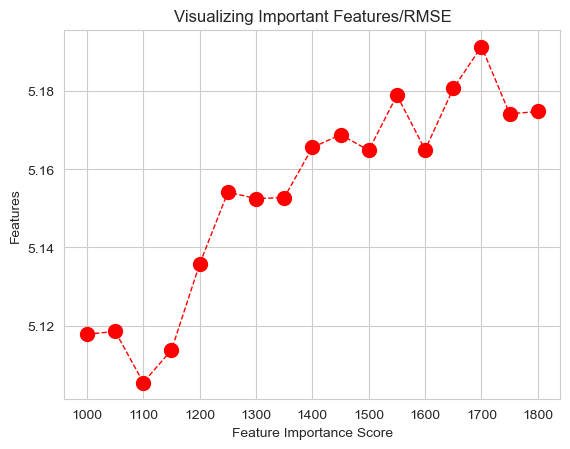

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [127]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,105]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'盐')

10


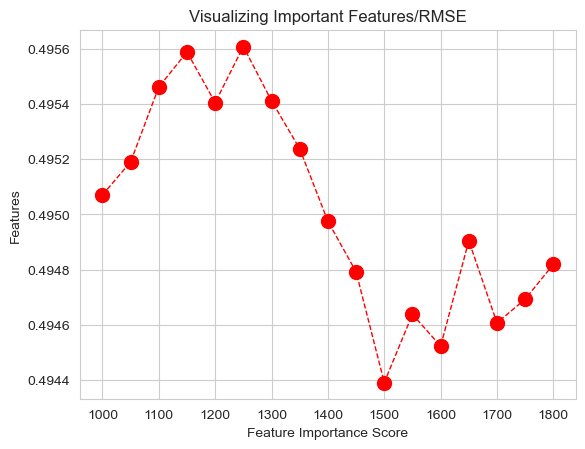

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [128]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,106]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'酱油')

9


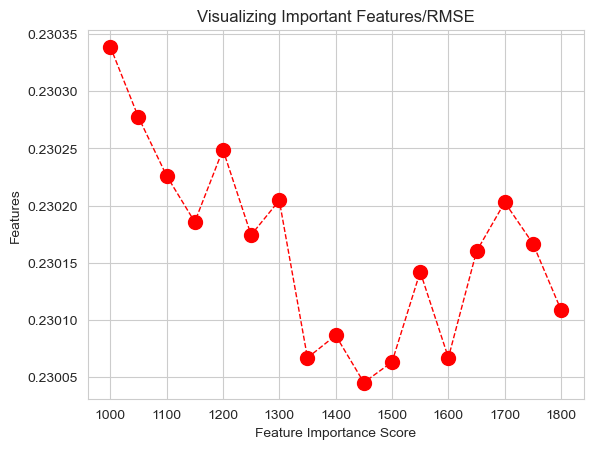

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [129]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,107]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'醋')

16


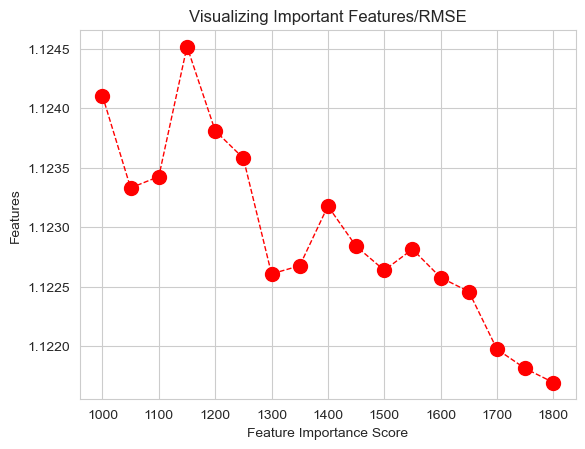

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [130]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,108]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'酱类')

16


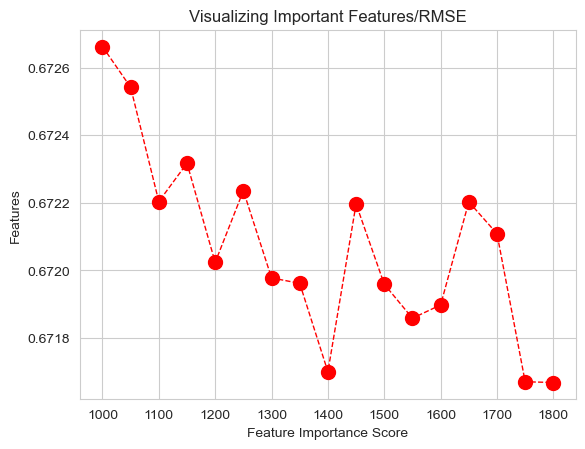

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [131]:
train_columns=[0,1,2,3,4,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,109]
test_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
completing_age(data,train_columns,test_columns,'味精')

9


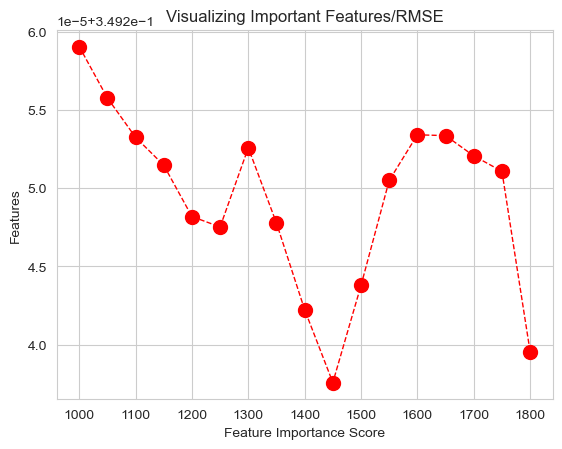

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [132]:
train_columns=[0,1,2,3,4,110]
test_columns=[0,1,2,3,4]
completing_age(data,train_columns,test_columns,'工作主要属于以下何种活动')

14


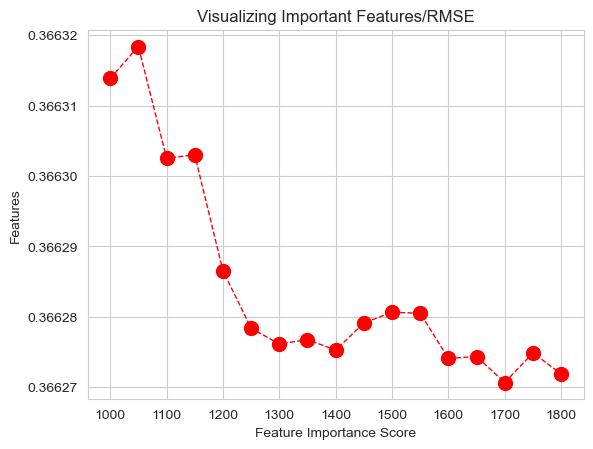

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [133]:
train_columns=[0,1,2,3,4,110,111]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'您做休闲、家务活动的强度')

2


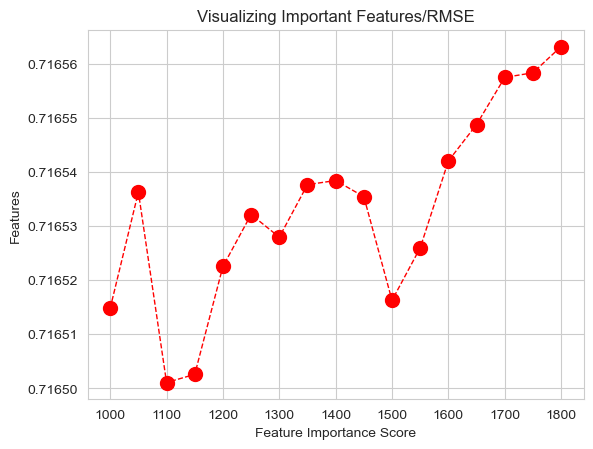

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [134]:
train_columns=[0,1,2,3,4,110,111,112]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'是否参加体育锻炼')

In [135]:
data=write_special_values(data,1,'是否参加体育锻炼','体育锻炼的强度')
data=write_special_values(data,1,'是否参加体育锻炼','平均每天体育锻炼时间')

6


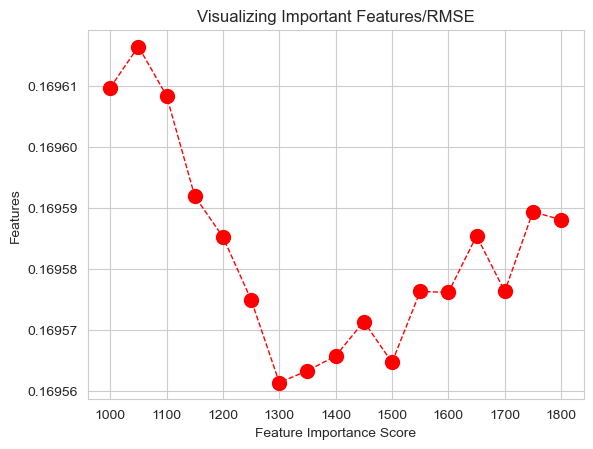

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [136]:
train_columns=[0,1,2,3,4,110,111,112,113]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'体育锻炼的强度')

15


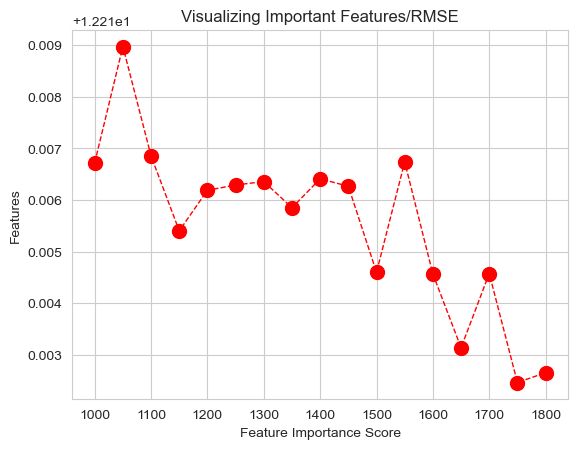

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3.0,0.0,0.0,0.0,1.0,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1.0,16.0,7.0,20.0,2.0,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3.0,0.0,0.0,0.0,1.0,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1.0,20.0,7.0,10.0,1.0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3.0,0.0,0.0,0.0,2.0,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1.0,17.0,7.0,20.0,2.0,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3.0,0.0,0.0,0.0,1.0,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [137]:
train_columns=[0,1,2,3,4,110,111,112,113,114]
test_columns=[0,1,2,3,4,5,6,7,8]
completing_age(data,train_columns,test_columns,'平均每天体育锻炼时间')

In [139]:
data.to_excel('output3.xlsx',index=False)

In [141]:
data=pd.read_excel('output3.xlsx')
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [142]:
train_columns=[0,1,2,3,4,110,111,112,113,114,115]
test_columns=[0,1,2,3,4,5,6,7,8,9]
completing_age(data,train_columns,test_columns,'最近一次测量血压距离现在有多长时间')


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by RandomForestRegressor.

In [145]:
data.最近一次测量血压距离现在有多长时间.isnull().sum()
data.to_excel('output4.xlsx',index=False)
data=pd.read_excel('output4.xlsx')

In [164]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,
                52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,
               78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
               101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,150,151,152,153,154,155,
              156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,
              116]
test_columns=[]
for i in range(142):
    test_columns.append(i)


14


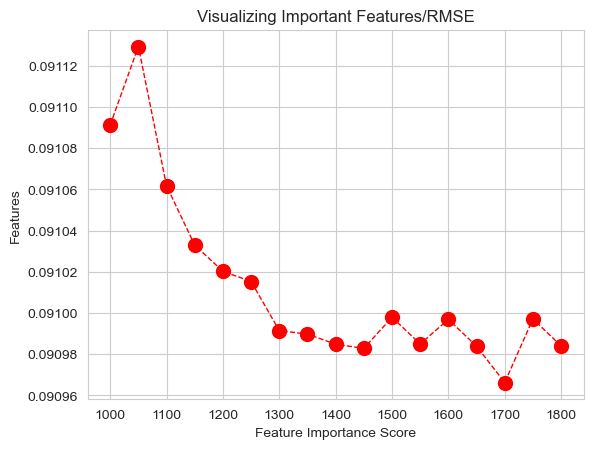

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [165]:
completing_age(data,train_columns,test_columns,'有没有被社区或以上医院的医生诊断过患有高血压')

14


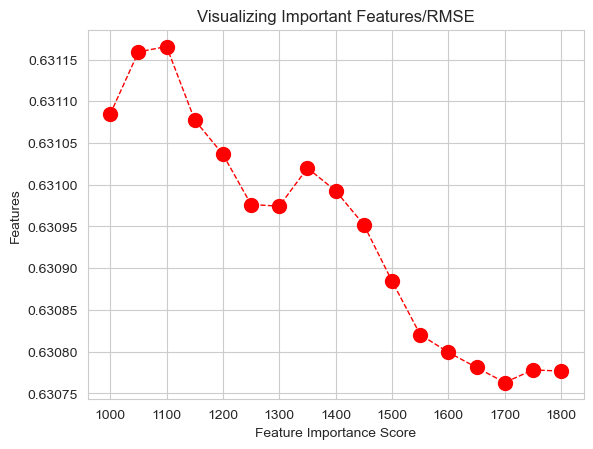

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [166]:
train_columns=[0,1,2,3,4,110,111,112,113,114,122]
test_columns=[0,1,2,3,4,5,6,7,8,9]
completing_age(data,train_columns,test_columns,'最近一次测量血糖距离现在有多长时间')

0


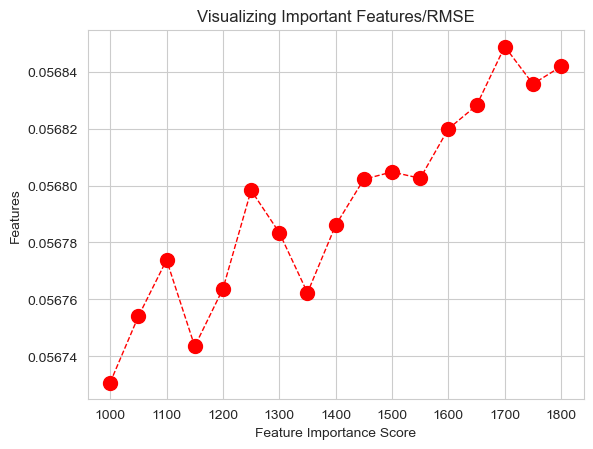

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [167]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,
                52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,
               78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
               101,102,103,104,105,106,107,108,109,110,111,112,113,114,150,151,152,153,154,155,
              156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,
              138]
test_columns=[]
for i in range(142):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'您有没有被社区或以上医院的医生诊断患有糖尿病')

15


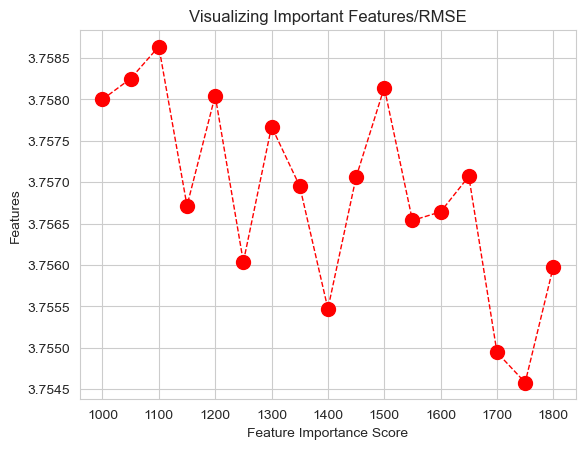

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [171]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,
                52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,
               78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
               101,102,103,104,105,106,107,108,109,110,111,112,113,114,138]
test_columns=[]
for i in range(114):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'体重')

15


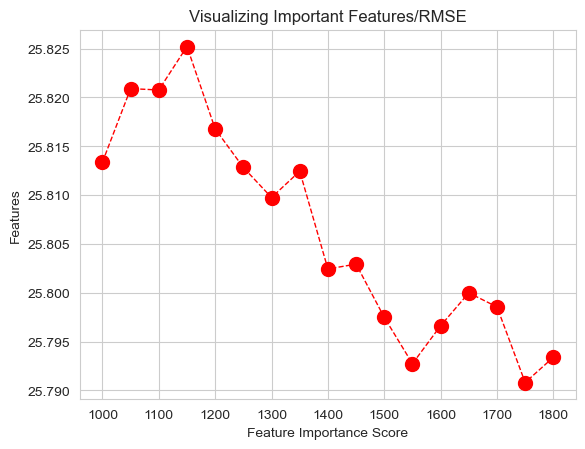

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [174]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,
                28,29,30,31,36,37,38,39,40,41,42,43,46,47,48,49,50,51,
                52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70,71,72,73,74,75,76,77,
               78,79,80,81,84,85,86,87,88,89,90,91,92,93,94,95,96,97,100,
               101,102,103,104,105,106,107,108,109,110,111,112,113,114,148]
test_columns=[]
for i in range(102):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'甘油三酯')

6


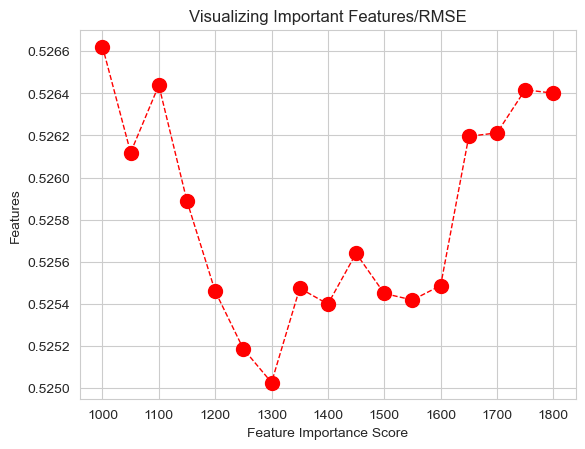

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [175]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,
                28,29,30,31,36,37,38,39,40,41,42,43,46,47,48,49,50,51,
                52,53,54,57,58,59,60,61,62,63,64,65,68,69,70,71,72,73,74,75,76,77,
               78,79,80,81,84,87,88,89,90,91,92,93,94,95,96,97,100,
               101,102,103,104,105,106,107,108,109,112,113,114,147]
test_columns=[]
for i in range(96):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'低密度脂蛋白')

0


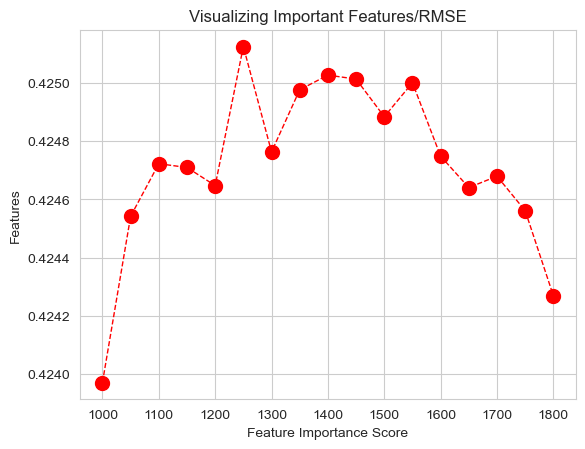

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [179]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,22,23,25,26,27,
                28,29,30,31,36,37,38,39,40,41,42,43,46,47,48,49,50,51,
                52,53,54,57,58,59,60,61,62,63,64,65,68,69,72,73,74,75,76,77,
               78,79,80,81,84,87,88,91,92,93,94,95,96,97,100,
               101,102,103,104,105,106,107,108,109,112,113,114,145]
test_columns=[]
for i in range(88):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'血糖')

In [180]:
data.to_excel('output4.xlsx',index=False)